In [5]:
import os
import numpy as np
from joblib import Parallel, delayed

data_folder = 'D:/dados_tcc/npy_rotacionadas_cortadas'
file_list = os.listdir(data_folder)
batch_size = 64 # Defina o tamanho do batch de acordo com suas preferências
target_size = (512, 512)  # Tamanho de destino após o preenchimento

# Função para processar um batch de imagens e calcular a soma e o somatório dos quadrados
def process_batch(batch):
    batch_sum = 0
    batch_squared_sum = 0
    batch_count = 0
    
    for file_name in batch:
        if file_name.endswith('.npy'):
            file_path = os.path.join(data_folder, file_name)
            data = np.load(file_path)
            
            # Adicionar padding para obter o tamanho 512x512
            padded_data = np.pad(data, ((0, target_size[0] - data.shape[0]), (0, target_size[1] - data.shape[1])), mode='constant')
            
            batch_sum += np.sum(padded_data)
            batch_squared_sum += np.sum(padded_data ** 2)
            batch_count += padded_data.size
    
    return batch_sum, batch_squared_sum, batch_count

# Dividir a lista de arquivos em batches
num_batches = len(file_list) // batch_size
file_batches = [file_list[i * batch_size: (i + 1) * batch_size] for i in range(num_batches)]

# Inicializar acumuladores para média e desvio padrão
total_sum = 0
total_squared_sum = 0
total_count = 0

# Usar Parallel do joblib para processamento paralelo
results = Parallel(n_jobs=-1, verbose=10)(delayed(process_batch)(batch) for batch in file_batches)

# Acompanhar o progresso manualmente
for i, (batch_sum, batch_squared_sum, batch_count) in enumerate(results):
    total_sum += batch_sum
    total_squared_sum += batch_squared_sum
    total_count += batch_count
    
    print(f"Processed batch {i+1}/{num_batches}")

# Calcular a média e o desvio padrão
mean = total_sum / total_count
std = np.sqrt(total_squared_sum / total_count - mean ** 2)

print("Média dos pixels:", mean)
print("Desvio padrão dos pixels:", std)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

Processed batch 1/1104
Processed batch 2/1104
Processed batch 3/1104
Processed batch 4/1104
Processed batch 5/1104
Processed batch 6/1104
Processed batch 7/1104
Processed batch 8/1104
Processed batch 9/1104
Processed batch 10/1104
Processed batch 11/1104
Processed batch 12/1104
Processed batch 13/1104
Processed batch 14/1104
Processed batch 15/1104
Processed batch 16/1104
Processed batch 17/1104
Processed batch 18/1104
Processed batch 19/1104
Processed batch 20/1104
Processed batch 21/1104
Processed batch 22/1104
Processed batch 23/1104
Processed batch 24/1104
Processed batch 25/1104
Processed batch 26/1104
Processed batch 27/1104
Processed batch 28/1104
Processed batch 29/1104
Processed batch 30/1104
Processed batch 31/1104
Processed batch 32/1104
Processed batch 33/1104
Processed batch 34/1104
Processed batch 35/1104
Processed batch 36/1104
Processed batch 37/1104
Processed batch 38/1104
Processed batch 39/1104
Processed batch 40/1104
Processed batch 41/1104
Processed batch 42/1104
P

[Parallel(n_jobs=-1)]: Done 1104 out of 1104 | elapsed:  4.0min finished


In [6]:
import numpy as np
import os

data = np.load(os.path.join(data_folder, file_list[8857]))

soma = np.sum(data)
quadrado = np.sum(data ** 2)
count = data.size


print("Média dos pixels:", soma/count)
print("Desvio padrão dos pixels:", np.sqrt(quadrado/count - (soma/count) ** 2))


# maior pixel 
print("Maior pixel:", np.max(data))

Média dos pixels: 228.05300137935774
Desvio padrão dos pixels: 402.985749999175
Maior pixel: 1769.1885474473238


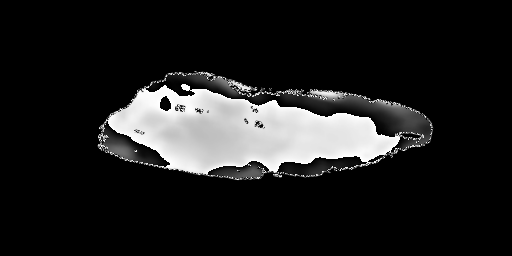

In [7]:
import numpy as np
from PIL import Image

data = np.load(os.path.join(data_folder, file_list[2]))

# Normalize the array to the range [0, 255] if needed
image_to_plot = (data).astype(np.uint8)

# Convert the NumPy array to a PIL Image
pil_image = Image.fromarray(image_to_plot, mode='L')  # 'L' mode for grayscale

pil_image

In [8]:
import pandas as pd 

file_names = pd.read_csv('../utils_csv/file_names.csv')

def add_prefix_based_on_type_binary(row):
    prefix = ""

    if row['type'] == 1300:
        prefix = "E:/Dario_depth/masks/1300s/binary/"
    elif row['type'] == 1400:
        prefix = "E:/Dario_depth/masks/1400s/binary/"
    elif row['type'] == 1500:
        prefix = "E:/Dario_depth/masks/1500s/binary/"

    return prefix + row['binary_image']

def add_prefix_based_on_type_npy(row):
    prefix = ""

    if row['type'] == 1300:
        prefix = 'E:/Dario_depth/depth/1300s/depth_cropped/'
    elif row['type'] == 1400:
        prefix = 'E:/Dario_depth/depth/1400s_new/depth/val/images/'
    elif row['type'] == 1500:
        prefix = 'E:/Dario_depth/depth/1500s_new/depth/val/images/'

    return prefix + row['npy_image']


file_names['binary_image'] = file_names.apply(add_prefix_based_on_type_binary, axis=1)
file_names['npy_image'] = file_names.apply(add_prefix_based_on_type_npy, axis=1)

In [9]:
npy_images = list(file_names['npy_image'])

print(npy_images[0])

E:/Dario_depth/depth/1300s/depth_cropped/calf_id_1387_20210621_743_depth_0042.npy


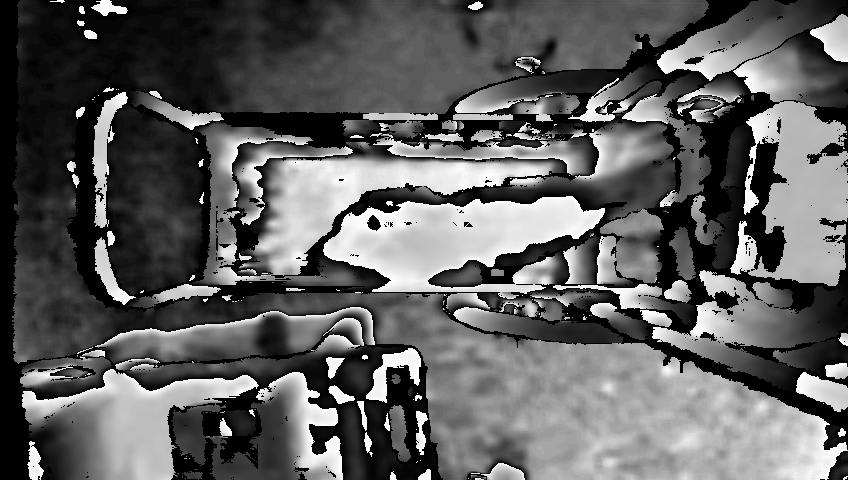

In [10]:
import numpy as np
from PIL import Image

index = 2

data1 = np.load(os.path.join(data_folder, file_list[index]))
data2 = np.load(npy_images[index])


# cacular media e desvio padrao
mean = np.mean(data1)
std = np.std(data1)

#normalizar imagem pelo desvio padrao e media
data1 = (data1 - mean) / std


# Normalize the array to the range [0, 255] if needed
image_to_plot = (data2).astype(np.uint8)

# Convert the NumPy array to a PIL Image
pil_image = Image.fromarray(image_to_plot, mode='L')  # 'L' mode for grayscale

pil_image

In [11]:
data = data1

soma = np.sum(data)
quadrado = np.sum(data ** 2)
count = data.size


print("Média dos pixels:", soma/count)
print("Desvio padrão dos pixels:", np.sqrt(quadrado/count - (soma/count) ** 2))


# maior pixel 
print("Maior pixel:", np.max(data))

Média dos pixels: -6.938893903907228e-18
Desvio padrão dos pixels: 1.0
Maior pixel: 4.028858882409183


In [12]:
print("Média dos pixels:", mean)
print("Desvio padrão dos pixels:", std)

Média dos pixels: 188.23928033355003
Desvio padrão dos pixels: 393.5181307362773
